In [1]:
import pandas as pd

In [ ]:
 ± {arr.std():.3f}

In [ ]:
df = pd.read_csv("run_han.csv")

col_drop = []
col_drop.append("ratio")
for c in df.columns:
    if "pairs" in c and "IMDB" in c:
        col_drop.append(c)
df = df[col_drop]

columns = df.columns
for c in columns:
    if "CCA" in c:
        cca = c
    if "CLL" in c:
        cl =c
    if "CLN" in c:
        cln = c
    if "AUTO" in c:
        auto = c
    if "ratio" in c:
        r = c
df = df[[r, cca, auto, cl, cln]]
df = df.rename(columns={cca:"cca", auto:"auto", cl:"cl", cln:"cln"})
import pandas as pd
import numpy as np
import ast

# Funktion, die String in Liste konvertiert, falls nötig, und dann Mittelwert ± Std berechnet
def mean_std_str(val):
    if isinstance(val, str):
        val = ast.literal_eval(val)
    arr = np.array(val, dtype=float)
    return f"{arr.mean():.4f} "

# DataFrame kopieren
df_summary = df.copy()

# Nur auf numerische Listenspalten anwenden, 'ratio' bleibt
for col in df.columns:
    if col != 'ratio':
        df_summary[col] = df[col].apply(mean_std_str)

df_summary.to_csv("tables/gcn/IMDB.csv")
latex_table = df_summary.to_latex(index=False)  # Set index=True if you want the index column
print(latex_table)


\begin{tabular}{rllll}
\toprule
 ratio &     cca &    auto &      cl &     cln \\
\midrule
  1.00 & 0.5550  & 0.5475  & 0.5645  & 0.5620  \\
  0.90 & 0.5145  & 0.5130  & 0.5125  & 0.5550  \\
  0.80 & 0.5490  & 0.5125  & 0.5235  & 0.5245  \\
  0.70 & 0.5450  & 0.5300  & 0.5035  & 0.5545  \\
  0.60 & 0.5110  & 0.5280  & 0.5295  & 0.5240  \\
  0.50 & 0.5195  & 0.4990  & 0.5205  & 0.5210  \\
  0.40 & 0.5050  & 0.5025  & 0.5145  & 0.5235  \\
  0.30 & 0.4740  & 0.4655  & 0.5055  & 0.4880  \\
  0.20 & 0.4955  & 0.4505  & 0.5000  & 0.4800  \\
  0.10 & 0.4285  & 0.4380  & 0.4235  & 0.4365  \\
  0.02 & 0.4000  & 0.4065  & 0.4165  & 0.4190  \\
  0.01 & 0.4100  & 0.4325  & 0.3950  & 0.4550  \\
  0.00 & 0.4255  & 0.4235  & 0.4110  & 0.4565  \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3446/2295997533.py:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_summary.to_latex(index=False)  # Set index=True if you want the index column


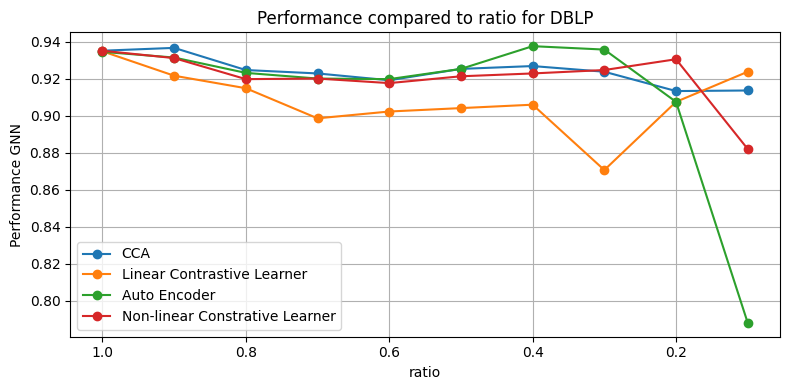

In [61]:
df = pd.read_csv("perf_dblp.csv")
df = df.drop(columns="Unnamed: 0")
df = df[:-3]
df = df.rename(columns={'DBLP_CCA_pca_30': 'CCA', 'DBLP_CLL_pca_30': 'Linear Contrastive Learner', 'DBLP_AUTO_pca_30': "Auto Encoder", "DBLP_CLNL_pca_30": "Non-linear Constrative Learner"})
import matplotlib.pyplot as plt
import pandas as pd
x = df['ratio']
y_columns = df.drop(columns='ratio')
cmap = plt.get_cmap('tab10')
# Plot
plt.figure(figsize=(8, 4))
for i, col in enumerate(y_columns.columns):
    plt.plot(x, y_columns[col], marker='o', label=col, color=cmap(i % 10))

plt.title('Performance compared to ratio for DBLP')
plt.xlabel('ratio')
plt.ylabel('Performance GNN')
plt.legend()
plt.gca().invert_xaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
<class 'heteroModels.HAN'>
Training: 100%|█████████████████████████████| 1000/1000 [04:04<00:00,  4.09it/s]
Using SAGE, accuracy is 43.6170220375061%
Results saved: caugc on IMDB with <class 'heteroModels.HAN'>
<class 'heteroModels.HeteroSGC'>
Training: 100%|█████████████████████████████| 1000/1000 [00:45<00:00, 21.99it/s]
Using HeteroSGC, accuracy is 46.492236852645874%
Results saved: caugc on IMDB with <class 'heteroModels.HeteroSGC'>
<class 'heteroModels.HeteroGCN'>
Training: 100%|█████████████████████████████| 1000/1000 [00:57<00:00, 17.31it/s]
Using HeteroGCN, accuracy is 44.652098417282104%
Results saved: caugc on IMDB with <class 'heteroModels.HeteroGCN'>
<class 'heteroModels.HeteroGCN2'>
Training: 100%|█████████████████████████████| 1000/1000 [01:05<00:00, 15.35it/s]
Using HeteroGCN2, accuracy is 45.88844180107117%
Results saved: caugc on IMDB with <class 'heteroModels.HeteroGCN2'>

SyntaxError: invalid character '█' (U+2588) (407861265.py, line 1)

In [ ]:
ugc_imdb = {
    "0.3" : {
        "han": ["42.9557204246521", "43.6170220375061", "43.6170220375061" , "43.358251452445984", "43.6170220375061"],
        "sgc":  ["46.03220224380493","46.492236852645874" , "46.492236852645874", "46.03220224380493", "46.492236852645874"],
        "gcn" : ["46.89476788043976", "44.652098417282104", " 44.652098417282104", "46.8947678804397", "44.652098417282104"],
        "gcn2": ["43.588268756866455", "45.88844180107117", "45.88844180107117", "43.588268756866455" ,"45.88844180107117%" ]
    },
     "0.5" : {
        "han": [],
        "sgc":  [],
        "gcn" : [],
        "gcn2": []
    }
    
        
}